## Exploratory Data Analysis

## (EDA) is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations.

This dataset contain information of twitter sentiment analysis, We will perform exploratory data analysis to get insight from the data.

## Packages Import

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

## Read the train data

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

In [2]:
# using pandas dataframe to read the data
df=pd.read_csv('Data/Train/Raw/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        700 non-null    int64 
 1   company   700 non-null    object
 2   feelings  700 non-null    object
 3   tweet     700 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.0+ KB


## EDA Analysis

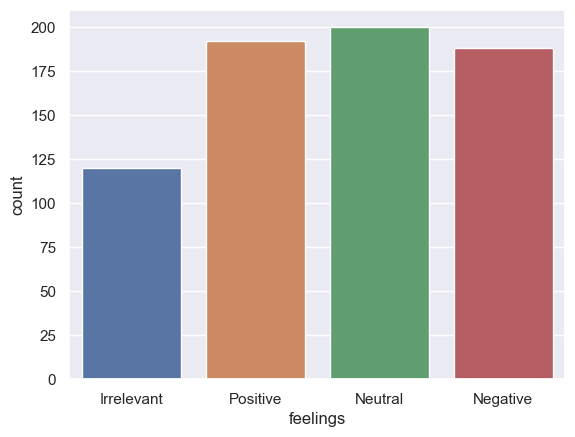

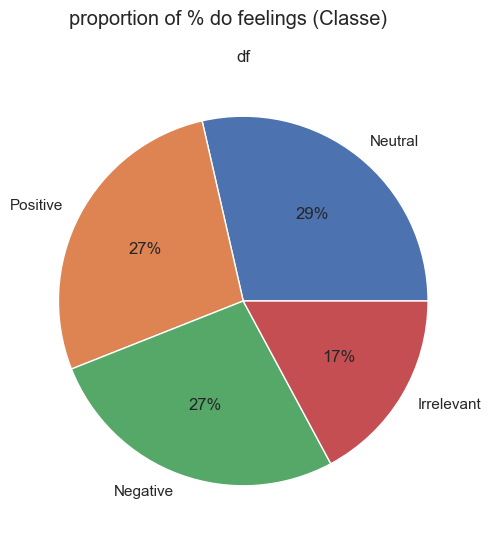

In [4]:
sns.countplot(x='feelings',data=df)
fig, ax = plt.subplots(1,figsize=(12,6))

ax.pie(df['feelings'].value_counts(),labels=df['feelings'].value_counts().index,autopct='%.f%%')

fig.suptitle("proportion of % do feelings (Classe)")
ax.set_title("df")

plt.show()

In [5]:
# Sentiment count by company or game
td=df.groupby(by=["company","feelings"]).count().reset_index()
td.head(10)

,company,feelings,id,tweet
0,Amazon,Irrelevant,2,2
1,Amazon,Negative,5,5
2,Amazon,Neutral,13,13
3,Amazon,Positive,5,5
4,ApexLegends,Irrelevant,3,3
5,ApexLegends,Negative,4,4
6,ApexLegends,Neutral,14,14
7,ApexLegends,Positive,7,7
8,AssassinsCreed,Irrelevant,1,1
9,AssassinsCreed,Negative,3,3


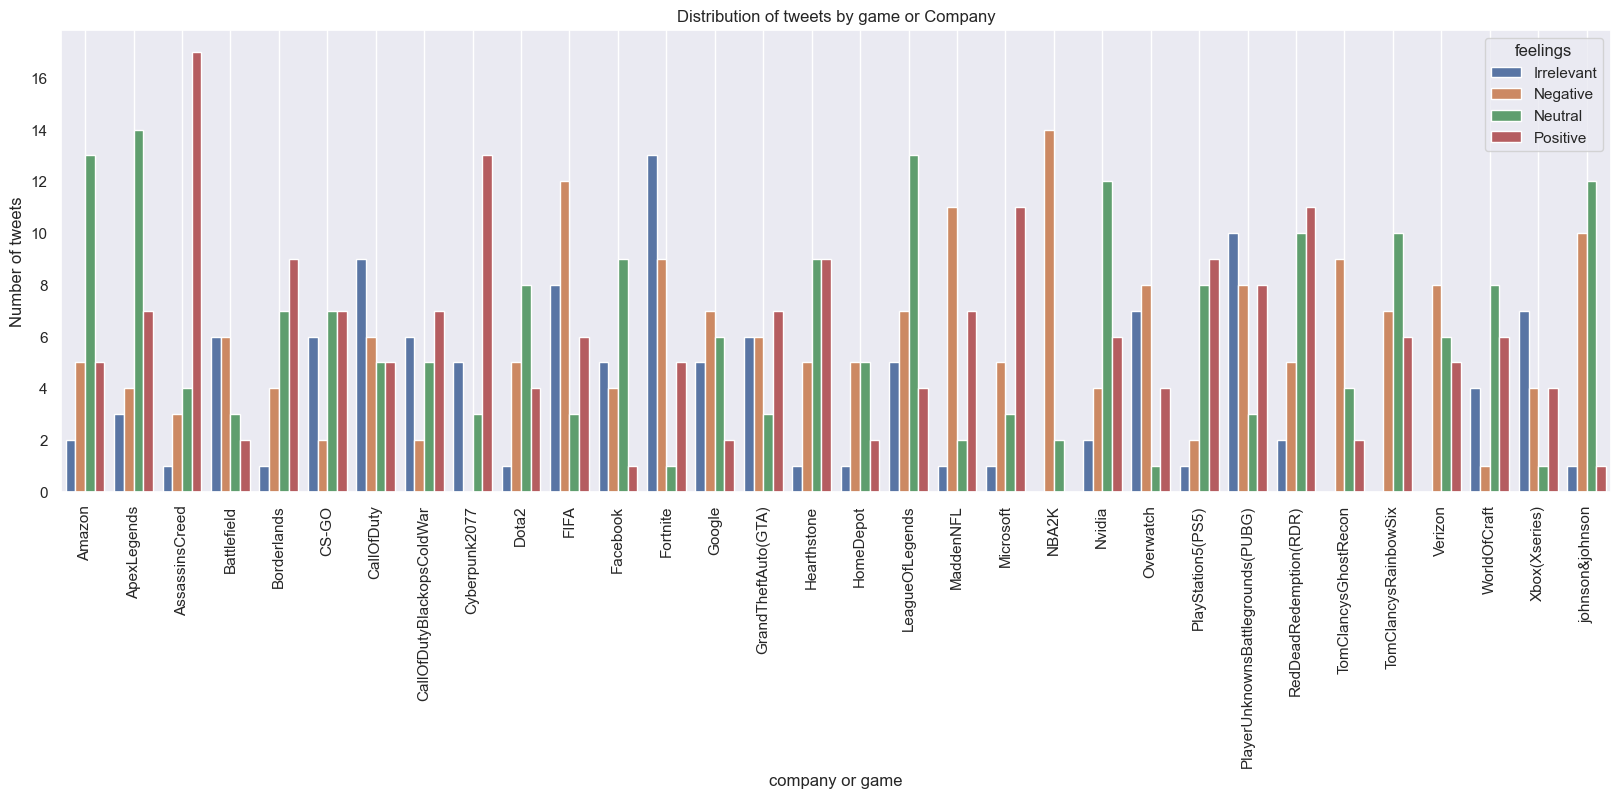

In [6]:
plt.figure(figsize=(20,6))
sns.barplot(data=td,x="company",y="id",hue='feelings')
plt.xticks(rotation=90)
plt.xlabel("company or game")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets by game or Company")
plt.show()